# Comparison of Software and Hardware Solutions

## Equations

$$ C\frac{dV}{dt} = \frac{I_{inj}}{A} - I_{leak} - I_{slow} - I_{fast} $$
$$ I_{leak} = g_{leak}(V - E_{leak}) $$
$$ I_{fast} = g_{fast}(V - E_{Na}) $$
$$ m_{\infty} = 0.5(1 + tanh(\frac{V - \beta_{m}}{\gamma{m}})) $$
$$ I_{slow} = g_{slow}w(V - E_{K}) $$
$$ w_{\infty} =  0.5(1 + tanh(\frac{V - \beta_{w}}{\gamma{w}})) $$
$$ \tau_{\infty} = \frac{1}{cosh(0.5\frac{V - \beta_{w}}{\gamma_{w}})} $$
$$ \frac{dw}{dt} = \phi\frac{w_{\infty} - w}{\tau_{\infty}} $$
$$ V = V + dt\frac{dV}{dt} $$
$$ w = w + dt\frac{dw}{dt} $$

## Required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
import time
import software as soft
import hardware as hard
from scipy import signal

## Create injected current timeseries

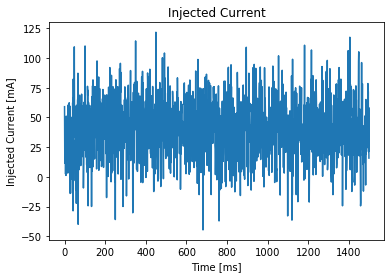

In [2]:
data_size = 1500
Iinj = 40 + 25*np.random.randn(data_size)

plt.plot(Iinj)
plt.xlabel("Time [ms]")
plt.ylabel("Injected Current [mA]")
plt.title("Injected Current")
plt.savefig('Injected_Current.png', dpi=300, bbox_inches='tight')
plt.show()

## Software solution

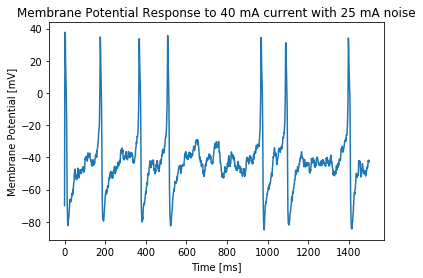

In [3]:
Vsoft, softTime = soft.sol(Iinj)

plt.plot(Vsoft)
plt.xlabel("Time [ms]")
plt.ylabel("Membrane Potential [mV]")
plt.title("Membrane Potential Response to 40 mA current with 25 mA noise")
plt.savefig('V_soft.png', bbox_inches='tight')
plt.show()

## Hardware solution

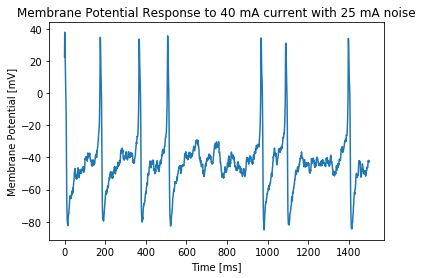

In [4]:
Vhard, hardTime = hard.sol(Iinj)

plt.plot(Vhard)
plt.xlabel("Time [ms]")
plt.ylabel("Membrane Potential [mV]")
plt.title("Membrane Potential Response to 40 mA current with 25 mA noise")
plt.savefig('V_hard.png', bbox_inches='tight')
plt.show()

## Peak differences

In [5]:
softpeaks, props = signal.find_peaks(Vsoft, height=20)
hardpeaks, props = signal.find_peaks(Vhard, height=20)
diffLen = len(softpeaks) - len(hardpeaks)
diff = np.zeros(len(hardpeaks))
for i in range(len(hardpeaks)):
    diff[i] = softpeaks[i+diffLen] - hardpeaks[i]
print(softpeaks)
print(hardpeaks)
print(softTime)
print(hardTime)

[   3  176  368  508  968 1090 1398]
[   1  176  368  508  968 1090 1398]
0.18098020553588867
0.03310441970825195
